# 대구 산격동 인구 현황

In [76]:
import csv

f = open('age.csv', encoding = 'euc_kr')
data = csv.reader(f)
header = next(data)
print(header)
# row[0]: 행정구역
for row in data:
    if '산격3' in row[0]: # '산격3'이 포함된 자료만 출력
        print(row)
f.close()

['행정구역', '2022년06월_계_총인구수', '2022년06월_계_연령구간인구수', '2022년06월_계_0세', '2022년06월_계_1세', '2022년06월_계_2세', '2022년06월_계_3세', '2022년06월_계_4세', '2022년06월_계_5세', '2022년06월_계_6세', '2022년06월_계_7세', '2022년06월_계_8세', '2022년06월_계_9세', '2022년06월_계_10세', '2022년06월_계_11세', '2022년06월_계_12세', '2022년06월_계_13세', '2022년06월_계_14세', '2022년06월_계_15세', '2022년06월_계_16세', '2022년06월_계_17세', '2022년06월_계_18세', '2022년06월_계_19세', '2022년06월_계_20세', '2022년06월_계_21세', '2022년06월_계_22세', '2022년06월_계_23세', '2022년06월_계_24세', '2022년06월_계_25세', '2022년06월_계_26세', '2022년06월_계_27세', '2022년06월_계_28세', '2022년06월_계_29세', '2022년06월_계_30세', '2022년06월_계_31세', '2022년06월_계_32세', '2022년06월_계_33세', '2022년06월_계_34세', '2022년06월_계_35세', '2022년06월_계_36세', '2022년06월_계_37세', '2022년06월_계_38세', '2022년06월_계_39세', '2022년06월_계_40세', '2022년06월_계_41세', '2022년06월_계_42세', '2022년06월_계_43세', '2022년06월_계_44세', '2022년06월_계_45세', '2022년06월_계_46세', '2022년06월_계_47세', '2022년06월_계_48세', '2022년06월_계_49세', '2022년06월_계_50세', '2022년06월_계_51세', '2022년06월_계_52세', '2022년

In [61]:
#7~
# 인덱스 형태 기억 (헤더부분)
# 인구분포를 보고 마케팅 등의 타게팅을 할 수 있겠지?

# import re => 정규(표현)식 : regular expression (regex)
# regex => 정규(표현)식 임을 알 것
# re.split => 여기선 간단하게만 수행해보쟈
# ex) s(170127) 자체를 싹다 사제

# 해당 자료에서는 천단위 콤마(,)가 없으니 굳이 없애는 것을 입력할 필요x
# -> 항상 데이터 상태 살펴보고

# 인구수 출력

In [62]:
import csv
with open('age.csv', encoding = 'euc_kr') as f:
    data = csv.reader(f)
    header = next(data)

    result = []
    for row in data:
        if '산격3' in row[0]: # '산격3'이 포함된 자료 중에서
            for data in row[3:]: # ‘0세 ~ 100세 이상까지 자료만 리스트에 추가
                result.append(data)
    print(result)

['13', '9', '19', '26', '22', '26', '24', '35', '16', '33', '30', '38', '37', '31', '38', '40', '35', '49', '127', '179', '193', '250', '345', '371', '351', '339', '298', '268', '231', '226', '205', '161', '158', '123', '90', '87', '81', '85', '75', '83', '106', '87', '112', '100', '68', '98', '92', '105', '117', '115', '109', '104', '131', '117', '114', '137', '124', '116', '108', '133', '120', '171', '158', '127', '135', '109', '129', '118', '102', '107', '103', '79', '98', '95', '84', '82', '44', '67', '55', '74', '46', '53', '61', '35', '39', '32', '39', '19', '18', '12', '10', '12', '8', '9', '2', '3', '0', '3', '0', '0', '1']


# 대구시 산격3동의 인구 분포 그래프 그리기

['대구광역시 북구 산격3동', '2723063000', '']


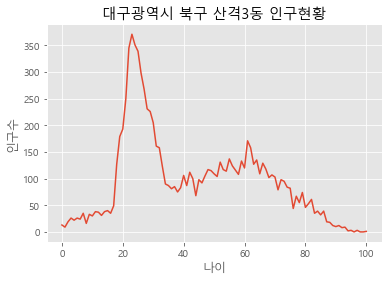

In [87]:
import csv
import matplotlib.pyplot as plt
import re
import platform

f = open('age.csv', encoding='euc_kr')
data = csv.reader(f)

result = []
city = ''

### 중요부분 ###
for row in data:
#     print(row[0])        # 0번 행의 자료들이 어떻게 들어가 있는지 확인
    if '산격3' in row[0]:  # 본인 동네 하려면 '관음동'
        str_list = re.split('[()]', row[0]) # [0]: '대구광역시 북구 산격3동(2723063000)'
        print(str_list)                     # split되어서 어떻게 보관되는지 확인
        city = str_list[0]
        for data in row[3:]: # 0세부터 100세 이상까지 데이터
            result.append(int(data)) # 숫자로 변환, result 리스트에 담아
#             print(result)
f.close()
### ###

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.title('{0} 인구현황'.format(city)) # 코드번호 떼고, 바로 타이틀로 사용하기 위한 re.split였음
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot') # R에서 사용하는 ggplot 패키지 형태
plt.plot(result)
plt.show()

# 정규식을 사용한 문자열 분리

import re  
re.split(패턴, 문자열, [최대분할개수])


- 전체를 디버깅 하지마셈
- 작은 단위의 테스트(small test, unit test)를 하면서 찾아낼 것  
 -> 따로 떼서 시험적으로 해보셈
- 정규식을 쓰기 위해서는 re.split가 있는 모듈을 열어야 함  
 -> import re
- re.split(패턴, 문자열, [최대분할개수])  
 ->      찾고자 하는 패턴, 원본문자열
- API reference를 찾아가면서 꼭 할 것

- 행정구역의 패턴을 확인 -> 남길 것, 제거할 것 등 구분해서 쓰기
- 캡처(2,3)





In [84]:
import re

city = '대구광역시 북구 산격3동(2723063000)'
str_list = re.split('[()]', city)

print(len(str_list), str_list)
print(str_list[0])
for i in range(len(str_list)):
    print(i)
    print('[{}]: {}'.format(i, str_list[i]))    

3 ['대구광역시 북구 산격3동', '2723063000', '']
대구광역시 북구 산격3동
0
[0]: 대구광역시 북구 산격3동
1
[1]: 2723063000
2
[2]: 


In [66]:
import re
s = 'apple orange:banana,tomato;melon'
fruits = re.split('[ ,:;]', s)          # 순서는 안지켜도 됨.
print(f're.split 결과: {fruits}')

# vs. 문자열 내장함수 split와 비교
fruits_1 = s.split(',')
print(f's.split 결과 : {fruits_1}')

re.split 결과: ['apple', 'orange', 'banana', 'tomato', 'melon']
s.split 결과 : ['apple orange:banana', 'tomato;melon']


# 실습: 인구 구조 그래프 함수 구현  
- 라이브러리만으로 작업하는 것은 한계가 있지  
 -> 함수 만들어 놓으면 불러오면 되는 것  
 -> 자주 쓰는 것은 만들어 놓아보자  
 - 반복 => for문, 함수 (떠올리기)  
 - tip) 1줄에 10개들어가면 한 줄 띄우기  
  
 - 앞의 함수 불러와서 사용
- 반복된 일을 하게 되니까, 패턴화된 업무에 적용하기 위해서 코드를 재사용 하셈  
 - 그동안의 개발 경력들로 누적된 모듈들의 함수들을 잘 쓰도록  
 - 모듈화해서 잘 모아놓을 것  

================================================================

# 인구 구조 그래프 함수 구현 #1

In [89]:
import csv
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import re
def parse_district_name(district):
    '''
    '행정구역' 명칭에서 숫자 부분을 제거함
    - 서울특별시 종로구 (1111000000)
    '''
    district_name = re.split('[()]', district)
    # [0]: 행정구역 이름, [1]: 코드 번호
    return district_name[0]

def print_population(population):
    '''
    특정 지역의 인구 현황을 화면에 출력함
    '''
    for i in range(len(population)):
        print('{0:3d}세: {1:4d}명'.format(i, population[i]), end=' ')
        if (i + 1) % 10 == 0:
            print()

# 인구 구조 그래프 함수 구현 #2 

In [68]:
def draw_population(district_name, population_list):
    '''
    특정 지역에 대한 인구 분포를 그래프로 나타냄(plot)
    - district_name: 지역 이름
    - population_list: 0~100세 이상까지 인구수 리스트
    '''
    # 그래프 출력
    
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
        plt.rc('font', family=font_name)
    else:
        plt.rc('font', family='AppleGothic')

    plt.style.use('ggplot')
    plt.title('{} 인구 현황'.format(district_name))
    plt.xlabel('나이')
    plt.ylabel('인구수')

    plt.bar(range(101), population_list)
    plt.xticks(range(0, 101, 10)) # 0세 ~ 100세 이상

    plt.plot(population_list)
    plt.show()

# 인구 구조 그래프 함수 구현 #3

인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: 관음동
  0세:   48명   1세:   44명   2세:   55명   3세:   56명   4세:   59명   5세:   73명   6세:   79명   7세:  120명   8세:  103명   9세:  106명 
 10세:  116명  11세:  135명  12세:   95명  13세:  118명  14세:  144명  15세:  130명  16세:  151명  17세:  158명  18세:  188명  19세:  168명 
 20세:  183명  21세:  199명  22세:  266명  23세:  205명  24세:  229명  25세:  239명  26세:  217명  27세:  223명  28세:  197명  29세:  200명 
 30세:  227명  31세:  157명  32세:  159명  33세:  152명  34세:  148명  35세:  140명  36세:  156명  37세:  143명  38세:  128명  39세:  145명 
 40세:  191명  41세:  183명  42세:  197명  43세:  196명  44세:  179명  45세:  199명  46세:  214명  47세:  255명  48세:  281명  49세:  312명 
 50세:  338명  51세:  337명  52세:  362명  53세:  396명  54세:  334명  55세:  335명  56세:  311명  57세:  347명  58세:  287명  59세:  398명 
 60세:  319명  61세:  387명  62세:  370명  63세:  307명  64세:  296명  65세:  271명  66세:  237명  67세:  252명  68세:  181명  69세:  193명 
 70세:  192명  71세:  132명  72세:  122명  73세:  123명  74세:  146명  75세:  130명  76세:   57명  77세:  105명  78세:   99명  79세:

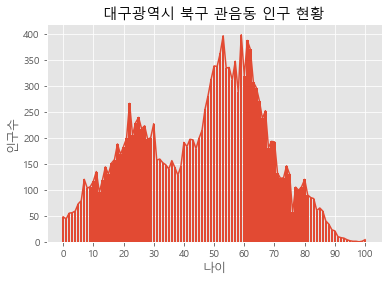

In [69]:
def get_population(district):
    f = open('age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data) # 헤더 정보 건너뜀
    population_list = []
    full_district_name = ''
    for row in data:
        if district in row[0]:
            full_district_name = parse_district_name(row[0]) # (시 구 동) 이름만 분리
            for data in row[3:]:
                if ',' in data:
                    data = data.replace(',','') # 천단위 콤마 제거
                population_list.append(int(data))
    f.close()
    print_population(population_list)
    draw_population(full_district_name, population_list)

district = input('인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ')
get_population(district)

In [70]:
## 위의 district_name 해결 => 들여쓰기 문제였음. 잘 보고 할 것

# 투표 가능 인구수 분석 #1

In [71]:
# city_population = int(city_populaiotn) 의 들여쓰기 주의
# #19
# 18세이 이상만 빼낼 거니까 [21:]
# break => 전체 것만 빼내기 위해

In [72]:
import csv
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import re

def parse_city_name(city):
    '''
    행정구역명에서 도시 이름 파싱 (코드 번호 제거)
    :param city:
    :return:
    '''
    city_name = re.split('[()]', city)
    # [0]: 행정구역 이름, [1]: 코드 번호
    return city_name[0]

In [73]:
def draw_piechart(city_name, city_population, voting_population):
    '''
    전체 인구수 대비 투표 가능 인구의 파이차트 작성
    '''
    non_voting_population = city_population - voting_population
    population = [non_voting_population, voting_population]
    
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')

    color = ['tomato', 'royalblue']
               
    plt.pie(population, labels=['18세 미만', '투표가능인구'],
            autopct='%.1f%%', colors=color, startangle=90)
               
    plt.legend()
    plt.title(city_name + " 투표 가능 인구 비율")
    plt.show()

투표 가능 인구수를 확인할 도시이름을 입력하시오: 대구광역시
대구광역시   전체 인구수:2,375,306명, 투표 가능 인구수: 2,042,207명


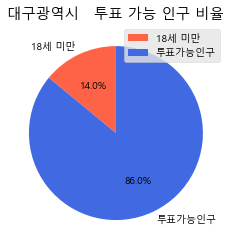

In [75]:
def get_voting_population(city):
    '''
    전체 인구수 : row[1], 투표 가능 인구수 분석 row[21:]
    '''
    f = open('age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data) # 헤더 정보 건너뜀

    city_name = ''
    city_population = 0 # 도시 전체 인구수
    voting_population = 0 # 투표 가능 인구수

    for row in data:
        if city in row[0]:
            city_population = row[1]
            if ',' in city_population:
                # 도시 전체 인구수에서 천단위 콤마 제거
                city_population = city_population.replace(',', '')
            city_population = int(city_population)
            city_name = parse_city_name(row[0]) # (시 구 동) 이름만 분리: 지역 번호 제거

            for data in row[21:]:
                if ',' in data:
                    data = data.replace(',','') # 천단위 콤마 제거
                voting_num = int(data)
                voting_population += voting_num # 누적된 투표 가능 인구수
            break                               # 위치 주의!!
    f.close()
    
    print('{} 전체 인구수:{:,}명, 투표 가능 인구수: {:,}명'.
    format(city_name, city_population, voting_population))
    draw_piechart(city_name, city_population, voting_population)
    
city = input('투표 가능 인구수를 확인할 도시이름을 입력하시오: ')
# '대구광역시'까지 써야합니당
get_voting_population(city)